#                                      Boston house pricing 

This is Boston's house price predicting project, where we are going to build the model to predict the value of houses
in Boston. Model is trained with the past data so that it can predict the future price, just by entering the specific parameters. Which would be helpful for a real estate agent daily.

# 
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
    
    
So our aim in this project is to find the features on which the Boston housing price depends.
Then using those features we are going to train the model so that in future, using those feature we can predict the price in Boston. 
Before that, we must to preprocess the data and remove the outliers from the data but data we have taken does not need to be preprocessed.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# orginal file when opened
odf = pd.read_csv('housing.data')
odf.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


# After small manipulation on data frame

In [3]:
df = pd.read_csv('housing.data', delim_whitespace=True, header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Attribute Information:

# 
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

# Placing the column name

In [4]:
colname = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns = colname
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploring the data

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

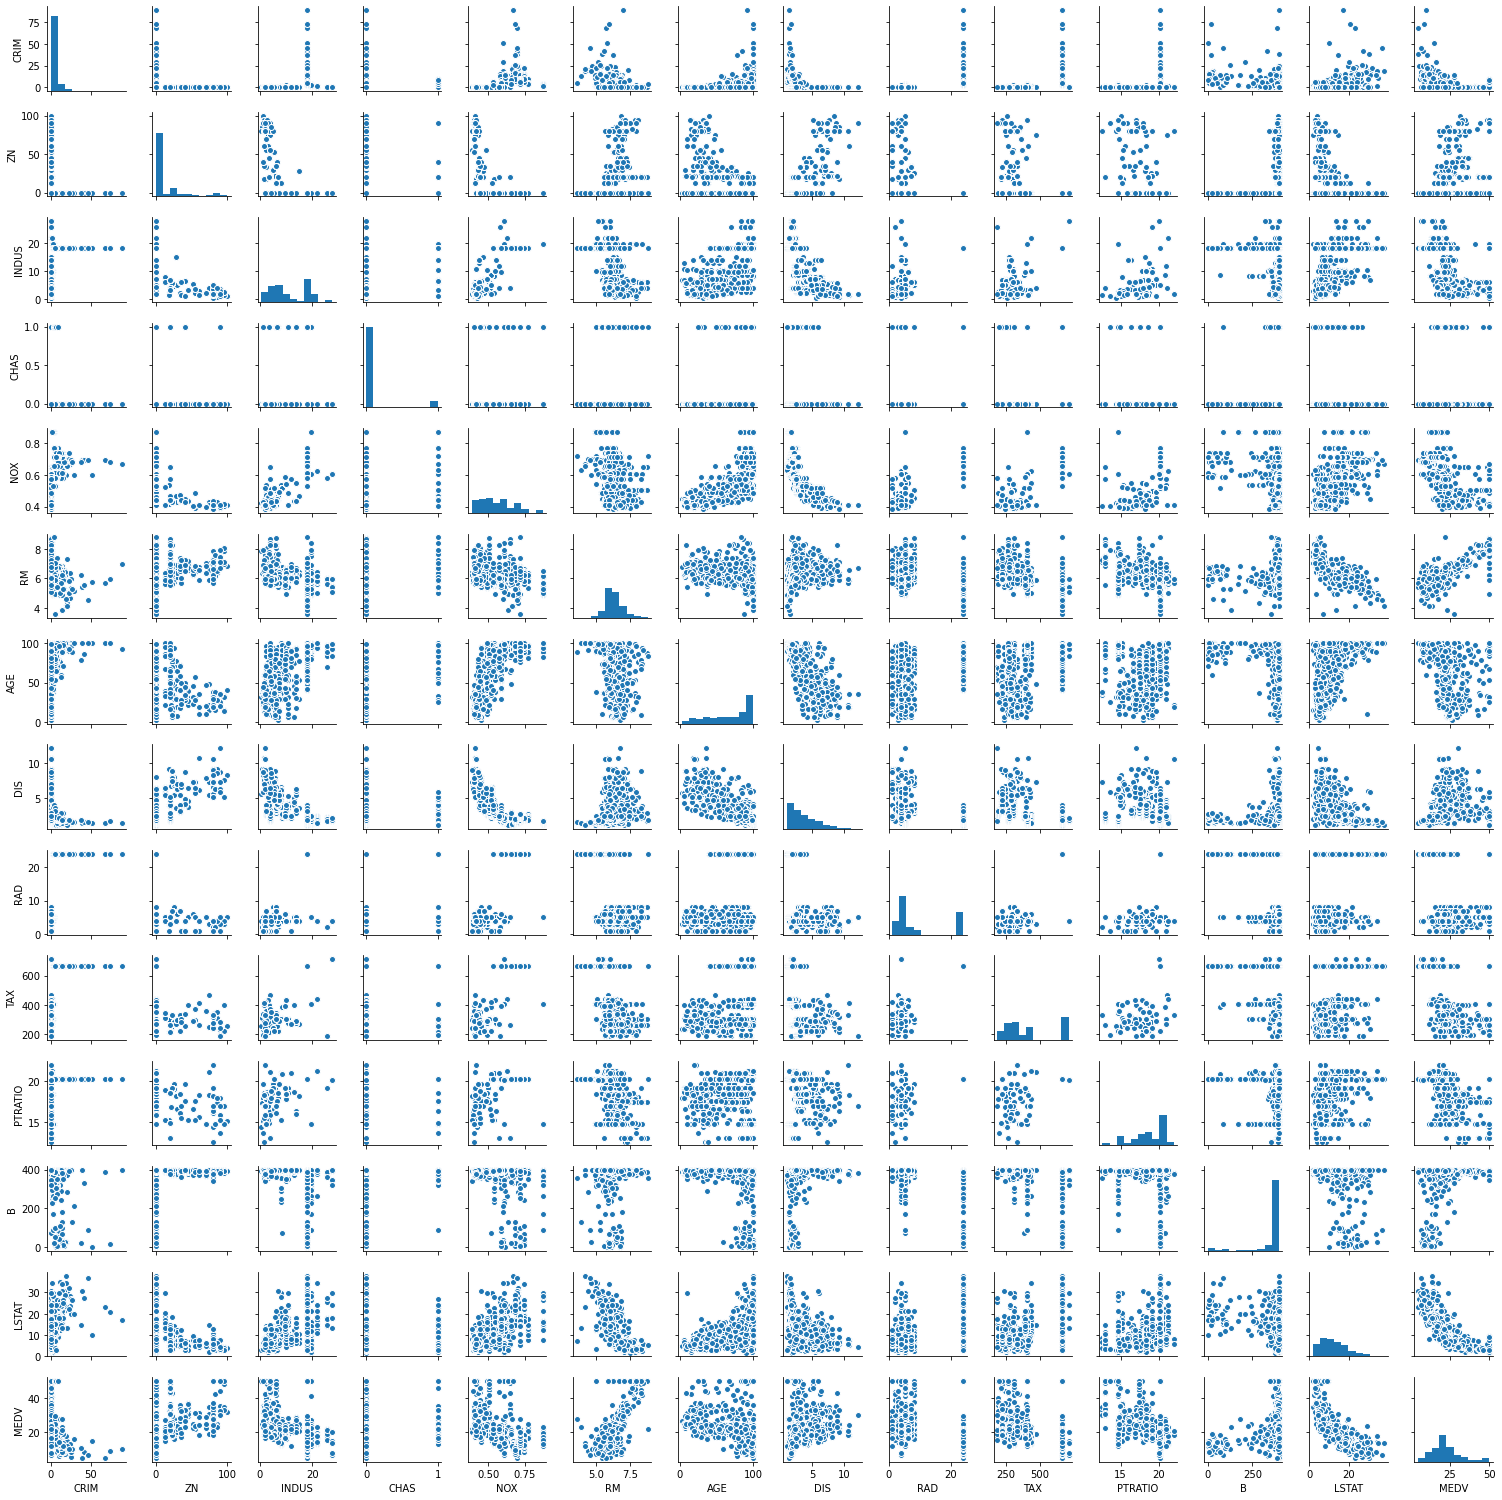

In [7]:
sns.pairplot(df, size=1.5);
plt.show()

# As the columns are too many , we will take few columns to find linearity

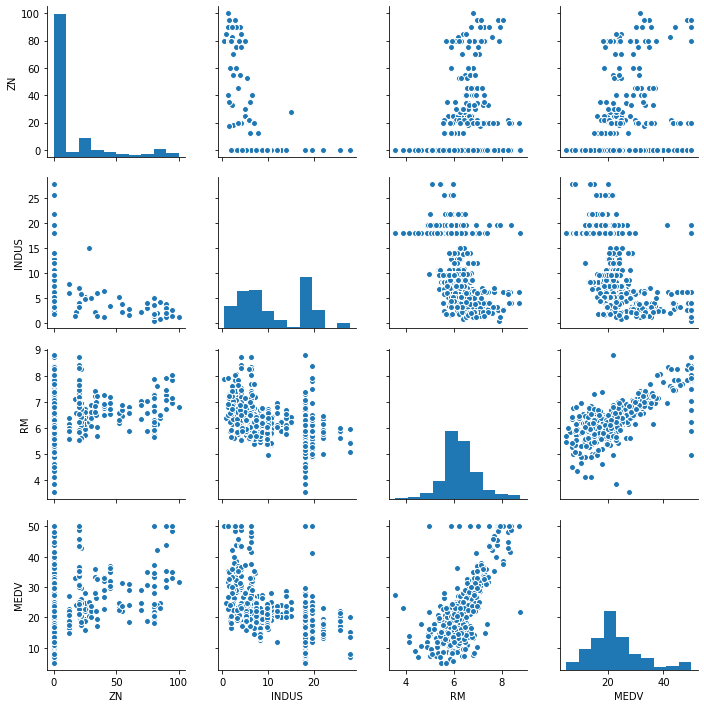

In [8]:
#for ZN, INDUS,NOX,RM
col = ['ZN','INDUS','RM', 'MEDV']
sns.pairplot(df[col], size=2.5);
plt.show()

#  Column Info
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

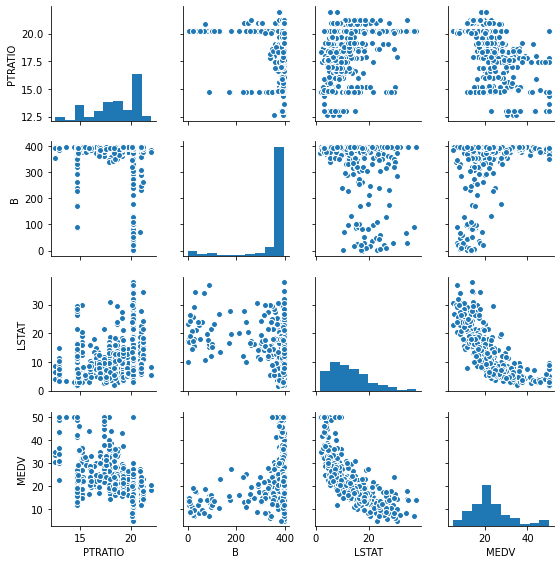

In [9]:
# CHECKING THE COL PTRATIO, B, LSTAT, MEDEV
col1 = ['PTRATIO','B','LSTAT','MEDV']
sns.pairplot(df[col1], size=2);
plt.show()

# Correlation analysis  for feature selection

The main reason of correlation analysis is to understand how each individual column relate to each other, and how they influence in predicting price.

In [10]:
#pd.options.display.float_format = '{:,.3f}'.format

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536



As MEDV is the coloumn with whom we have to check the relation of each colum, we can se that , RM and ISTAT col has the highest relation

# Heatmap analysis

Heatmap is the other way to findout correlation using figure

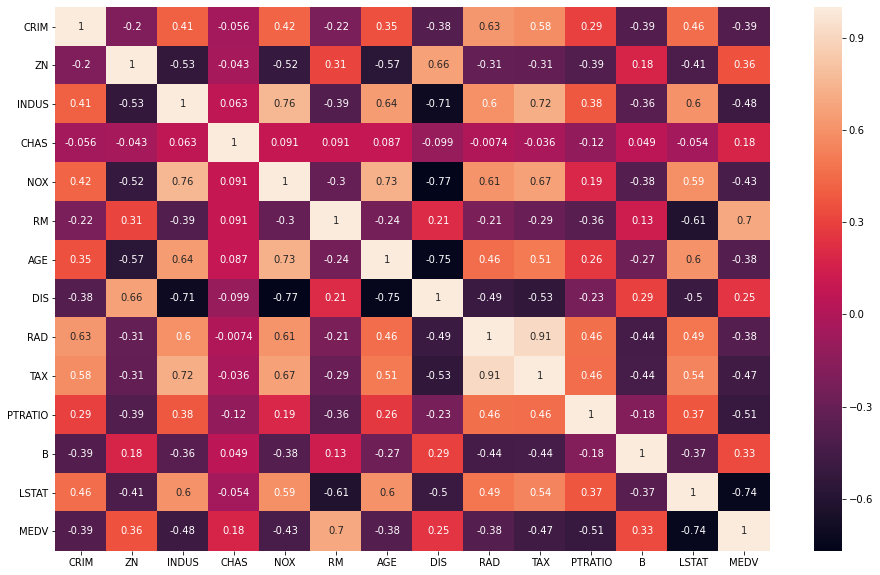

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

As we can see from the above figure "RM" is higly correlated with "MEDV" and "LSTAT" is inversly correlated to "MEDV"
so we will take RM and LSTAT as our feature for prediction.

#  Selecting Features and Applying Linear Regression 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
# Selecting X and Y
lis = ['RM','LSTAT']
BostonLabel = df[lis]
BostonTarget = df['MEDV']


In [16]:
X_train, X_test, y_train,y_test =train_test_split(BostonLabel,BostonTarget,test_size=0.2, random_state=1)
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)
print("This is coefficent", linearModel.coef_)
print("This is intercept", linearModel.intercept_)

print("Score of linear model: ", linearModel.score(X_train,y_train))


This is coefficent [ 4.5389694  -0.65930795]
This is intercept 2.4934145277051876
Score of linear model:  0.6251836356449056


# Model Evaluation Metrices for  Regression

# Model evaluation on training Data.


In [20]:

y_Train_predict = linearModel.predict(X_train)

print(" ---------------Metrics evaluation on Train Data----------------------")

print("Mean absolute error: ", metrics.mean_absolute_error(y_train,y_Train_predict))
print("Means squared error: ", metrics.mean_squared_error(y_train,y_Train_predict))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_train,y_Train_predict)) )
print("R2 Score: ", metrics.r2_score(y_train,y_Train_predict))

 ---------------Metrics evaluation on Train Data----------------------
Mean absolute error:  3.888350061949802
Means squared error:  30.278185000751513
Root mean squared error:  5.5025616762333085
R2 Score:  0.6251836356449056


# Model evaluation on test data.

In [47]:
y_test_predict = linearModel.predict(X_test)

print(" ---------------Metrics evaluation on Test Data----------------------")

print("MAE(Mean absolute error)     : ", metrics.mean_absolute_error(y_test,y_test_predict))
print("MSE(Means squared error)     : ", metrics.mean_squared_error(y_test,y_test_predict))
print("RMSE(Root mean squared error): ", np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)) )
print("R2 Score:                    : ", metrics.r2_score(y_test, y_test_predict))

 ---------------Metrics evaluation on Test Data----------------------
MAE(Mean absolute error)     :  4.505211813354641
MSE(Means squared error)     :  32.08375607139392
RMSE(Root mean squared error):  5.664252472426871
R2 Score:                    :  0.6753556251471675


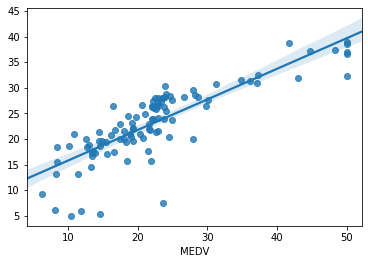

In [19]:
sns.regplot(y_test, y_test_predict)
plt.show()

 We can see that straight line is unable to capture the pattern in the data, this is "Under fitting" data.
To overcome the underfitting we will use polynomial Regression

# Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_fea = PolynomialFeatures(degree=2)

#Transforming X_train feature according to degree
Xtrainpoly= poly_fea.fit_transform(X_train)


# fitting the Transform X_trianed feature in Linear regression model
lin_Poly_reg = LinearRegression()
lin_Poly_reg.fit(Xtrainpoly,y_train)


# predicting on Train dataset

poly_train_predict = lin_Poly_reg.predict(Xtrainpoly)
#print(" poly train predict", poly_train_predict)

# predicting on Test Dataset
poly_test_predict = lin_Poly_reg.predict(poly_fea.fit_transform(X_test))

#print("poly test predict", poly_test_predict)



# Evaluating Polynomial model on train and test data set

In [38]:
# Evaluating on train data set
print("-----------------------Evaluating on polynomial train data set------------------")
print("MAE(Mean absolute error): ", metrics.mean_absolute_error(y_train,poly_train_predict))
print("MSE(Means squared error): ", metrics.mean_squared_error(y_train,poly_train_predict))
print("RMSE(Root mean squared error): ", np.sqrt(metrics.mean_squared_error(y_train,poly_train_predict)) )
print("R2 Score: ", metrics.r2_score(y_train,poly_train_predict))

-----------------------Evaluating on polynomial train data set------------------
MAE(Mean absolute error):  3.13731549930411
MSE(Means squared error):  21.287481398300194
RMSE(Root mean squared error):  4.613835865990488
R2 Score:  0.7364803609004456


In [39]:
# Evaluating on test data set
print("-----------------------Evaluating on polynomial test data set---------------------")
print("MAE(Mean absolute error): ", metrics.mean_absolute_error(y_test,poly_test_predict))
print("MSE(Means squared error): ", metrics.mean_squared_error(y_test,poly_test_predict))
print("RMSE(Root mean squared error): ", np.sqrt(metrics.mean_squared_error(y_test, poly_test_predict)) )
print("R2 Score: ", metrics.r2_score(y_test, poly_test_predict))

-----------------------Evaluating on polynomial test data set---------------------
MAE(Mean absolute error):  3.2284510802668347
MSE(Means squared error):  17.61317554853036
RMSE(Root mean squared error):  4.196805397981941
R2 Score:  0.8217783992497046


# After using polynomial regression, our model performance is improved RMSE is reduced and R2 score is increased.

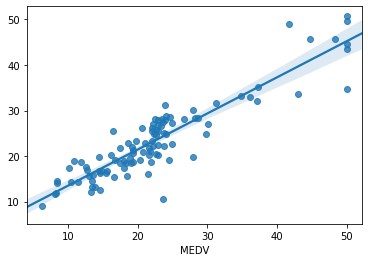

In [37]:
sns.regplot(y_test, poly_test_predict)
plt.show()

In [45]:
# Predict with random RM and LSTAT 

lin_Poly_reg.predict(poly_fea.fit_transform([[5,3]]))

array([25.6863384])